## Hierarchical Clustering

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Exploratory Data Analysis And Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


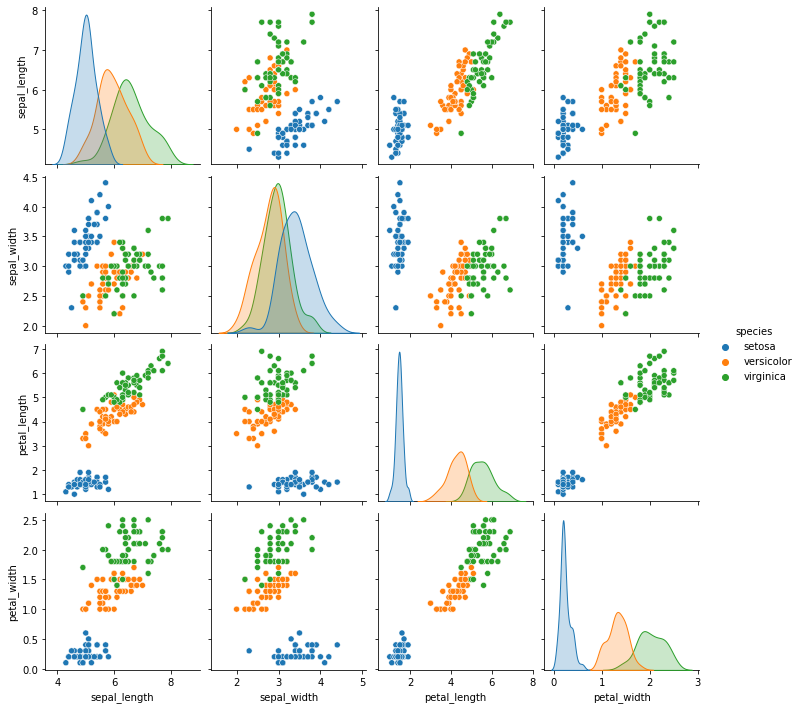

In [5]:
sns.pairplot(df, hue = "species");

In [6]:
X = df.drop("species", axis=1)

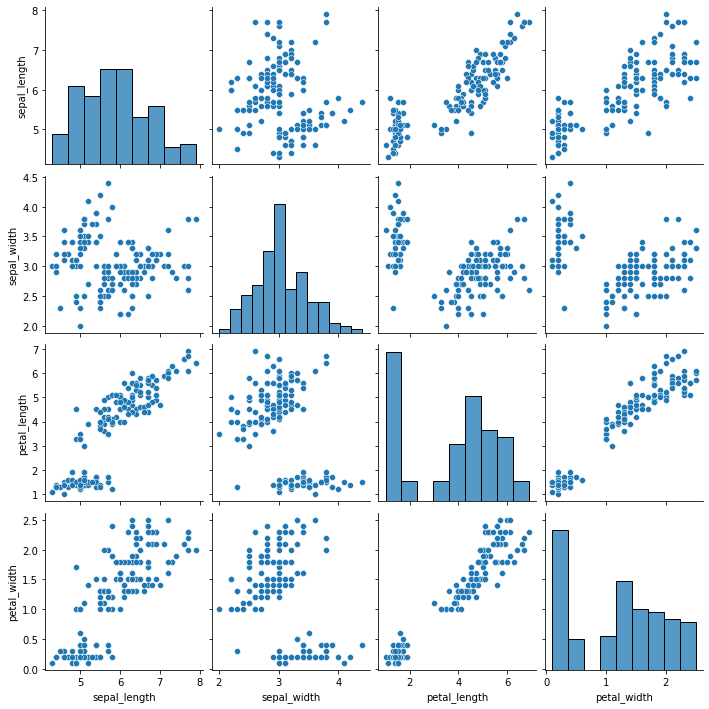

In [7]:
sns.pairplot(X);

### Hopkins Test

- Hopkins test, a statistical test for randomness of a variable.
- Null Hypothesis (Ho) : Data points are generated by non-random, uniform distribution (implying no meaningful clusters)
- Alternate Hypothesis (Ha): Data points are generated by random data points (presence of clusters)
- The more close 0, the more available to separate clusters

In [8]:
from pyclustertend import hopkins

In [9]:
hopkins(X, X.shape[0])
# hopkins test score 0.5 altı threshold gibi düşünülebilir. Fakat 0.3 ve altı iyi bir kümele için min değerdir.
# hopkins test verilerimizin random mı uniform mu dağıldığının kontrolünü yapar. Kümele yapabilmek için verilerin random olarak dağılması gerekir.

0.16910675206709982

In [10]:
# Not: Eğer datamızdaki veriler arasında fazla bir fark (bire-onluk bire-yüzlük farklar az olarak düşünebiliriz) yok ise veya aynı metrikler (cm) kullanılmış ise scale işlemi uygulamamak daha iyidir. Çünkü gerçek değerlerin kullanılması daha iyi sonuçlar verir. 

### Dendrogram

- Tree-like hierarchical representation of clusters is called a dendrogram.   
- It illustrates the arrangement of the clusters produced by the corresponding analyses.

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [12]:
# dendrogram()

**“linkage” parameter: (default= “ward”)**

  {‘ward’, ‘complete’, ‘average’, ‘single’}

Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. 
-	Ward minimizes the variance of the clusters being merged.
-	Average uses the average of the distances of each observation of the two sets.
-	Complete or maximum linkage uses the maximum distances between all observations of the two sets.
-	Single uses the minimum of the distances between all observations of the two sets.


In [13]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")
# linkage fonksiyonu cluster için, dendrogram ise grafiği oluşturmak için kullanılıyor.

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [45.0, 45.0, 62.5, 62.5],
  [22.5, 22.5, 53.75, 53.75],
  [5.0, 5.0, 38.125, 38.125],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [93.75, 93.75, 133.75, 133.75],
  [21.5625, 21.5625, 113.75, 113.75],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [175.0, 175.0, 193.75, 193.75],
  [165.0, 165.0, 184.375, 184.375],
  [67.65625, 67.65625, 174.6875, 174.6875],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [230.0, 230.0, 250.0, 250.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [295.0, 295.0, 312.5, 312.5],
  [335.0, 335.0, 345.0, 345.0],
  [365.0, 365.0, 375.0, 375.0],


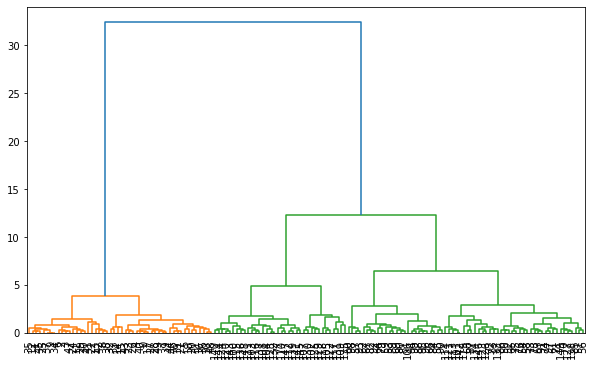

In [14]:
dendrogram(hc_ward,leaf_font_size = 10) 
# hc_ward bizim Z değerimiz

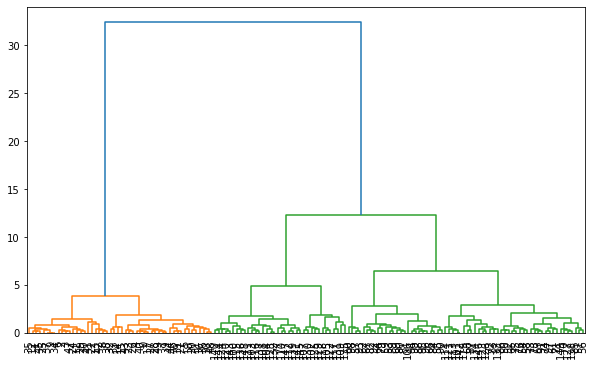

In [15]:
dendrogram(hc_ward,leaf_font_size = 10); 
# Sona ; konulması yukarıdaki gibi tüm değerlerin gösterilmesini engelliyor ve sadece grafiği gösteriyor. 

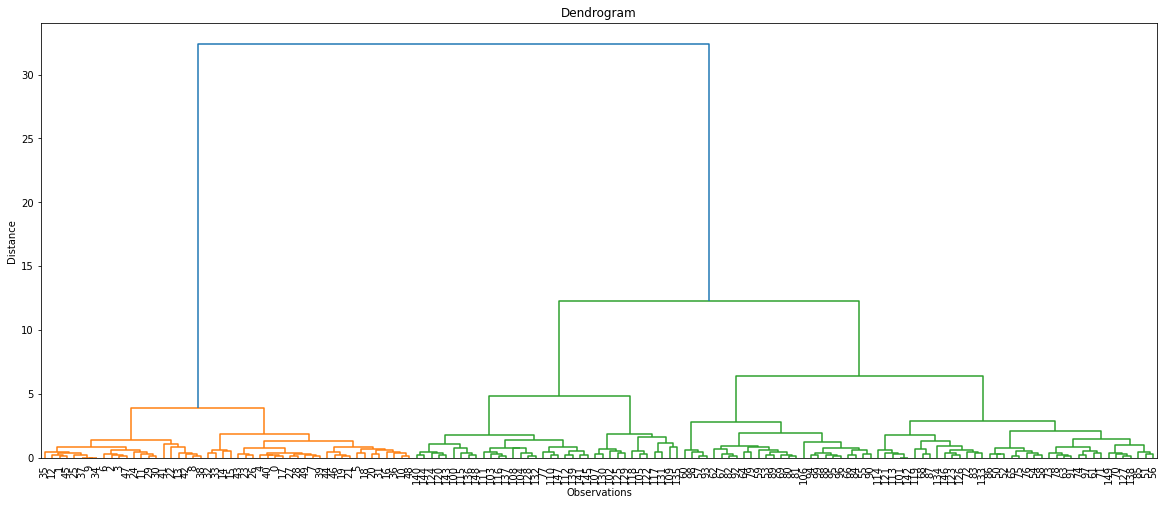

In [16]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

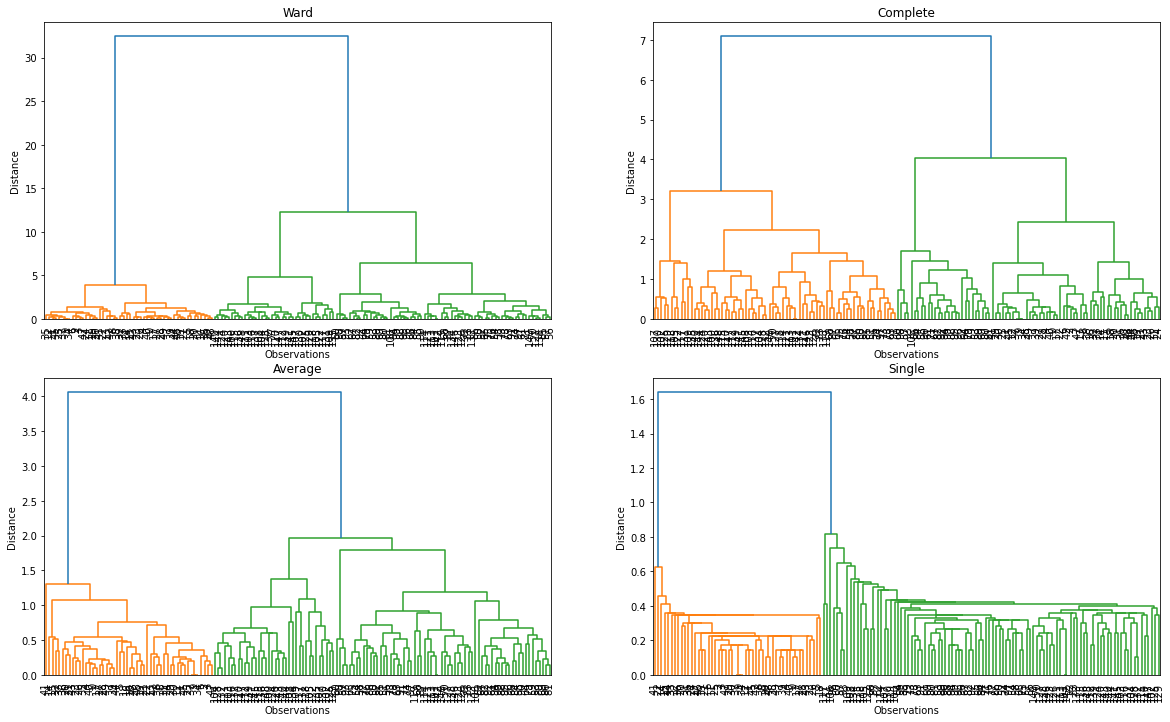

In [17]:
plt.figure(figsize = (20,12))
plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

# (ward) variance karesi alarak oluşturduğu için cluster (küme) lar arası mesafe (y ekseni değeri) daha fazla oluyor ve genellikle "ward" kullanılıyor.
# Cluster sayımızı belirlerken oluşturulan cluster şekillerinin y eksenindeki değerler arası en uzak olan moktaların arasından yatay bir çizgi çekerek bu çizgiyi dikey kesen çizgi sayısı bize cluster sayımızı veriyor. 

### Hierarchical Clustering (Agglomerative)

- Ideal clustering is characterised by minimal intra cluster distance and maximal inter cluster distance

In [18]:
from sklearn.cluster import AgglomerativeClustering

### S(Silhouette) Score

- If the ground truth labels are not known, evaluation must be performed using the model itself. (One of the evaluation method is Silhouette Coefficient)
- A higher Silhouette Coefficient score relates to a model with better defined clusters. 
- Her veri için iki uzaklığı baz alır. Bu uzaklıklardan ilki verinin bulunduğu kümeye ait diğer verilere olan uzaklıkların ortalamasıdır. İkincisi veriye en yakin komsu kümenin tum verilerine olan uzaklıkların ortalamasıdır.

In [19]:
from sklearn.metrics import silhouette_score

In [20]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X, model.labels_)}')
# silhouette_score muz ne kadar 1 e yakınsa kümeleme o kadar iyi olur. silhouette_score verilen (n_clusters) kümeleme sayılarına göre scores üretiyor. Biz bu scores lara bakarak ve diğer scores larıda hesaba katarak (n_clusters) sayımızı belirliyoruz. 

Silhouette Score for 2 clusters: 0.6863930543445408
Silhouette Score for 3 clusters: 0.5540972908150553
Silhouette Score for 4 clusters: 0.4887398491004218
Silhouette Score for 5 clusters: 0.4841553526240121
Silhouette Score for 6 clusters: 0.3618845152256815
Silhouette Score for 7 clusters: 0.34485408962742314
Silhouette Score for 8 clusters: 0.3462405312208591
Silhouette Score for 9 clusters: 0.33313850659637134


In [21]:
model1 = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X)
# affinity = "euclidean" , linkage = "ward" default değerler.

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [22]:
model1.labels_
# Cluster modellerinde (labels_) ve (fit_predict(X)) aynı değerleri verir. Çünkü Hierarchical cluster modellerinde predict olayı yoktur.

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

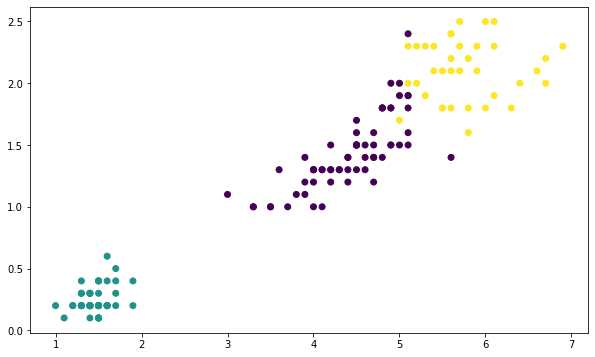

In [23]:
plt.scatter(df.iloc[:,2], df.iloc[:,3], c = model1.labels_, cmap = "viridis");

In [24]:
clusters = model1.labels_

In [25]:
df["predicted_clusters"] = clusters

In [26]:
ct = pd.crosstab(df["predicted_clusters"], df["species"])
ct

species,setosa,versicolor,virginica
predicted_clusters,,,
0,0,49,15
1,50,0,0
2,0,1,35


In [27]:
map_dict = {"virginica":2,
            "setosa":1,
            "versicolor": 0}
# Cluster değerleri ile gerçek değerleri karşılaştırmak için species sütunumuzdaki değerleri numerik değerlere (cluster numerik değerlerine göre) dönüştürüyoruz.

In [28]:
df["original_classes"]= df.species.map(map_dict)
# map fonksiyonu yukarıda oluşturduğumuz dictionary değerlerinin dönüşümünü sağlıyor.

In [29]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters,original_classes
0,5.1,3.5,1.4,0.2,setosa,1,1
1,4.9,3.0,1.4,0.2,setosa,1,1
2,4.7,3.2,1.3,0.2,setosa,1,1
3,4.6,3.1,1.5,0.2,setosa,1,1
4,5.0,3.6,1.4,0.2,setosa,1,1


In [30]:
df.iloc[:,0]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

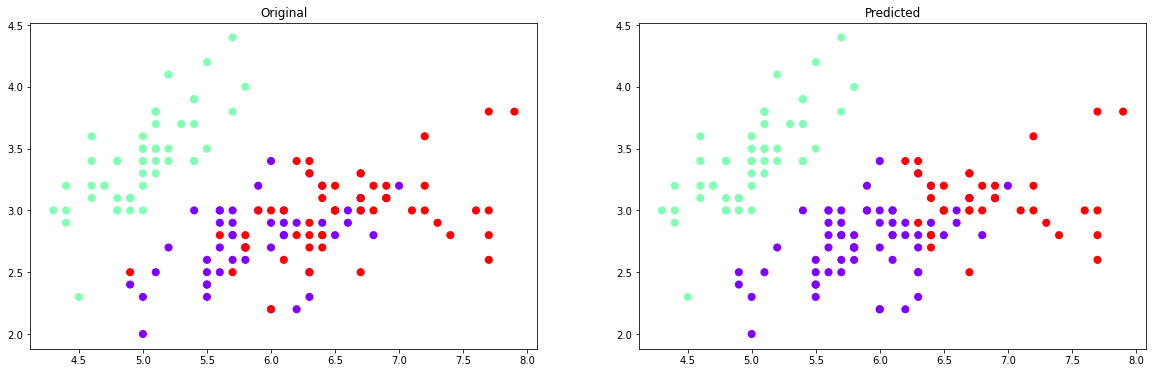

In [31]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.title("Original")
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = df.original_classes, s = 50, cmap = "rainbow")

plt.subplot(122)
plt.title("Predicted")
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = df.predicted_clusters, s = 50, cmap = "rainbow");
# x=df.iloc[:,0] (sepal_length), y=df.iloc[:,1] (sepal_width), c parametresi ise belirtilen sütundaki renklendirmek istediğimiz data (1,2,3)

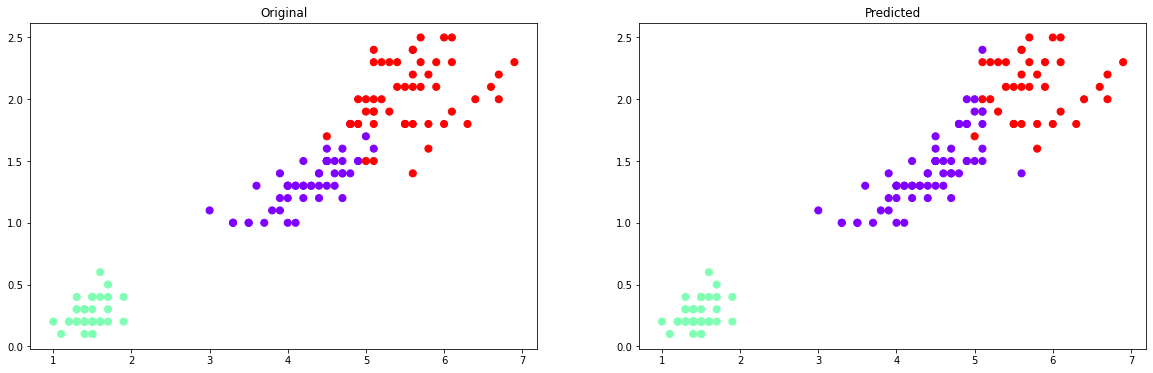

In [32]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.title("Original")
plt.scatter(df.iloc[:,2], df.iloc[:,3], c = df.original_classes, s = 50, cmap = "rainbow")

plt.subplot(122)
plt.title("Predicted")
plt.scatter(df.iloc[:,2], df.iloc[:,3], c = df.predicted_clusters, s = 50, cmap = "rainbow");

### ARI Score

- The Adjusted Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
- The value of ARI indicates no good clustering if it is close to zero or negative, and a good cluster if it is close to 1.

In [33]:
from sklearn.metrics.cluster import adjusted_rand_score

In [34]:
adjusted_rand_score(df['species'], df['predicted_clusters'])
# ARI Score bize modelimizin genel performansını veriyor.

0.7311985567707746

In [35]:
adjusted_rand_score(df['original_classes'], df['predicted_clusters'])
# Not: hem string hemde numerik karşılaştırma yaptırdığımız da aynı ARI score aldık.

0.7311985567707746

In [36]:
df['species']

(0         setosa
 1         setosa
 2         setosa
 3         setosa
 4         setosa
          ...    
 145    virginica
 146    virginica
 147    virginica
 148    virginica
 149    virginica
 Name: species, Length: 150, dtype: object,)

In [37]:
df['predicted_clusters']

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    0
147    2
148    2
149    0
Name: predicted_clusters, Length: 150, dtype: int64

In [38]:
df['original_classes']

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: original_classes, Length: 150, dtype: int64

In [39]:
df['predicted_clusters']

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    0
147    2
148    2
149    0
Name: predicted_clusters, Length: 150, dtype: int64

### Remodeling According To Discriminating Features

In [40]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters,original_classes
0,5.1,3.5,1.4,0.2,setosa,1,1
1,4.9,3.0,1.4,0.2,setosa,1,1
2,4.7,3.2,1.3,0.2,setosa,1,1
3,4.6,3.1,1.5,0.2,setosa,1,1
4,5.0,3.6,1.4,0.2,setosa,1,1


In [41]:
clus_pred = df.iloc[:, [0, 1, 2, 3, 5]].groupby("predicted_clusters").mean().T
clus_pred
# Burada df.iloc[:, [0, 1, 2, 3, 5]] bize 0, 1, 2, 3, 5 sütunları seçmemizi sağlıyor.

predicted_clusters,0,1,2
sepal_length,5.920313,5.006,6.869444
sepal_width,2.751563,3.418,3.086111
petal_length,4.420313,1.464,5.769444
petal_width,1.434375,0.244,2.105556


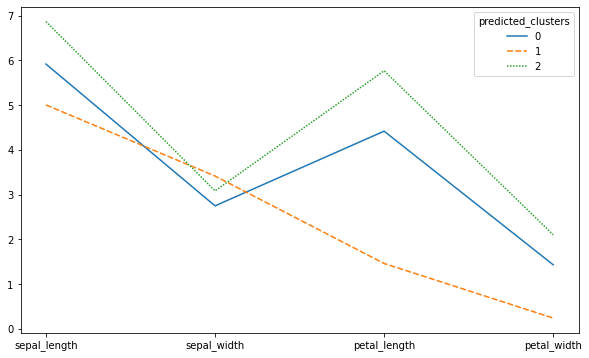

In [42]:
sns.lineplot(data = clus_pred);
# Modelimizi grafikte gördüğümüz gibi en iyi ayrışan faetures lar "petal_length" ve "petal_width" ile tekrar oluşturacağız. Çünkü bu features ların y eksenindeki değerler arasındaki fark diğerlerininkinden daha fazla bu daha iyi ayrıştığını gösteriyor.

In [43]:
Z = df.iloc[:, [2,3]] # iloc[:, [2,3]] = petal_length, petal_width
Z.head()
# En iyi ayrışan features larımızı seçiyoruz.

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


### Hopkins Test

In [44]:
hopkins(Z, Z.shape[0])
# hopkins scores muzun sıfıra daha yakın olduğunu görüyoruz. Sıfıra yakınlık en iyisi

0.11440312061309489

### Dendrogram

In [45]:
hc_ward = linkage(y = Z, method = "ward")
hc_complete = linkage(Z, "complete")
hc_average = linkage(Z, "average")
hc_single = linkage(Z, "single")

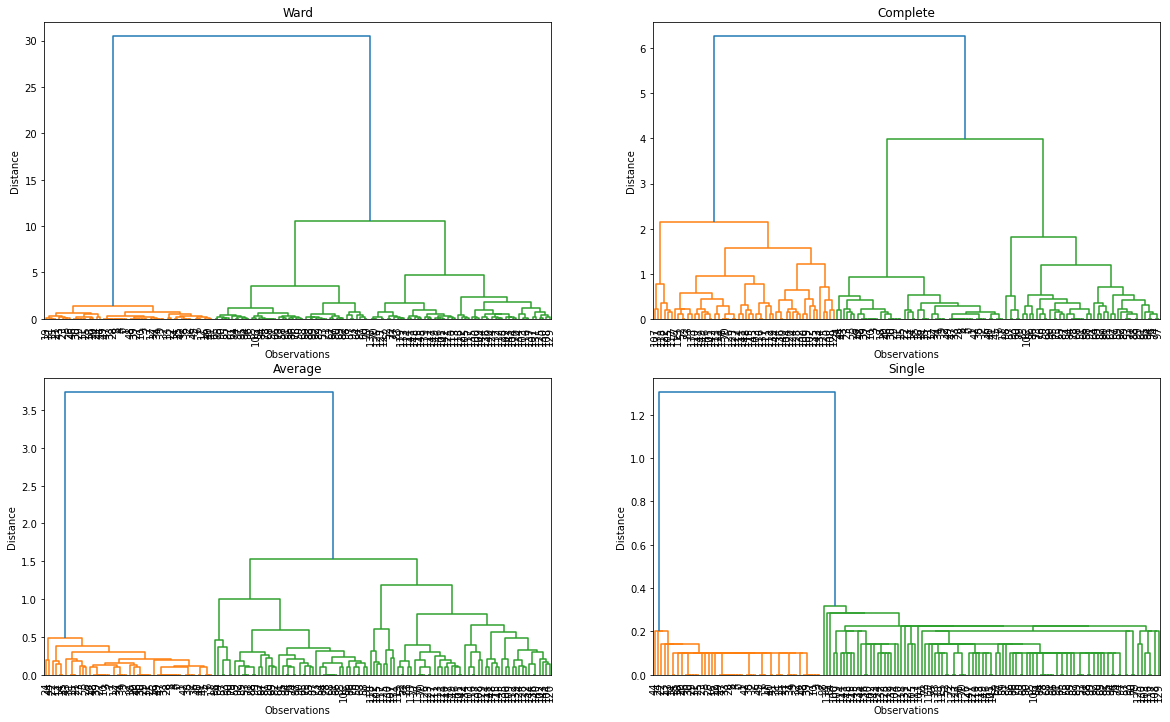

In [46]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

### S(Silhouette) Score

In [47]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(Z)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(Z, model.labels_)}')
# hopkins scores muzdaki iyileşmenin S(Silhouette) score muza da etki ettiğini görüyoruz. S(Silhouette) score ne kadar 1 e yakınsa model o kadar iyi kümeleme yapıyor. Bu yüzden cluster sayısını yüksek S(Silhouette) score ları arasından seçmeliyiz.

Silhouette Score for 2 clusters: 0.7667234280554557
Silhouette Score for 3 clusters: 0.6571856448729174
Silhouette Score for 4 clusters: 0.5893247167081789
Silhouette Score for 5 clusters: 0.57795322338552
Silhouette Score for 6 clusters: 0.5744995921566008
Silhouette Score for 7 clusters: 0.582843311312708
Silhouette Score for 8 clusters: 0.5676106719982476
Silhouette Score for 9 clusters: 0.5467111936909043


In [48]:
model2 = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
clusters = model2.fit_predict(Z)
# cluster sayımızı (n_clusters) 3 olarak belirledik.
# Bu modellerde genellikle (affinity = "euclidean") ve (linkage = "ward") olarak seçilir. (affinity) küme içerisindeki veriler arasındaki uzaklık için kullanılır, burada (euclidean) metodu ile hesaplama yapıyor. (linkage) ise kümeler arasındaki uzaklığın ölçü tipidir, burada (ward) variance karesini alarak işlem yapıyor.

In [49]:
Z["species"] = df["species"]
Z["predicted_clusters"] = clusters
Z

,petal_length,petal_width,species,predicted_clusters
0,1.4,0.2,setosa,1
1,1.4,0.2,setosa,1
2,1.3,0.2,setosa,1
3,1.5,0.2,setosa,1
4,1.4,0.2,setosa,1
...,...,...,...,...
145,5.2,2.3,virginica,0
146,5.0,1.9,virginica,0
147,5.2,2.0,virginica,0
148,5.4,2.3,virginica,0


In [50]:
Z_ct = pd.crosstab(Z["predicted_clusters"], Z["species"])
Z_ct
# crosstab ile oluşturulan cluster (küme) ların gerçek dataki veriler karşılaştırıyoruz ve ne kadar iyi kümeleme yaptığını gözlemliyoruz.
# Not: Biz burada datadaki gerçek verileri (label) bildiğimiz için karşılaştırabiliyoruz fakat gerçek bir veride labellar bilinmediği için karşılaştırma yapma imkanımız yoktur. Bu labellar ancak domain bilgisi ile yorumlanarak tahmini olarak elde edilebilir ve doğruluğu kesin değildir. Clustering ın amacı kümeleme işlemini olabildiğince doğru yapabilmektir.  

species,setosa,versicolor,virginica
predicted_clusters,,,
0,0,5,49
1,50,0,0
2,0,45,1


In [51]:
ct

species,setosa,versicolor,virginica
predicted_clusters,,,
0,0,49,15
1,50,0,0
2,0,1,35


In [52]:
map_dict = {"virginica":0,
            "setosa":1,
            "versicolor": 2}

In [53]:
Z["original_classes"]= Z.species.map(map_dict)
Z

,petal_length,petal_width,species,predicted_clusters,original_classes
0,1.4,0.2,setosa,1,1
1,1.4,0.2,setosa,1,1
2,1.3,0.2,setosa,1,1
3,1.5,0.2,setosa,1,1
4,1.4,0.2,setosa,1,1
...,...,...,...,...,...
145,5.2,2.3,virginica,0,0
146,5.0,1.9,virginica,0,0
147,5.2,2.0,virginica,0,0
148,5.4,2.3,virginica,0,0


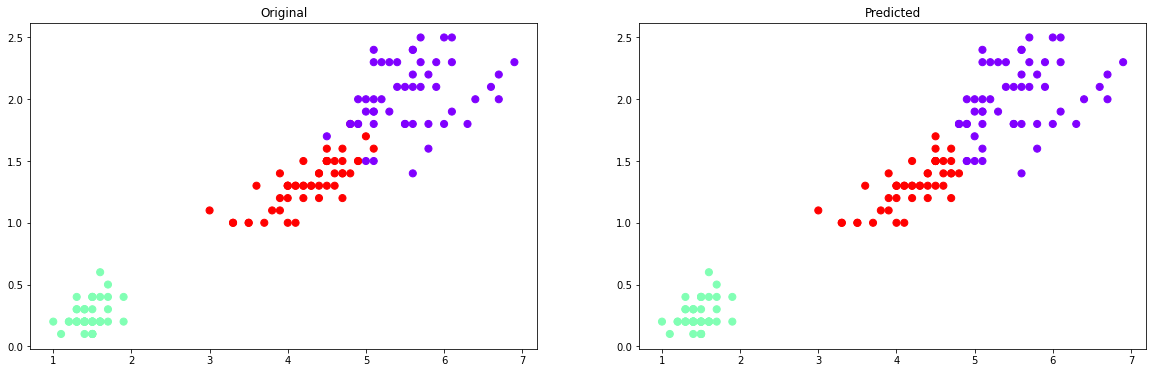

In [54]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.title("Original")
plt.scatter(Z.iloc[:,0], Z.iloc[:,1], c = Z.original_classes, s = 50, cmap = "rainbow")

plt.subplot(122)
plt.title("Predicted")
plt.scatter(Z.iloc[:,0], Z.iloc[:,1], c = Z.predicted_clusters, s = 50, cmap = "rainbow");

### ARI Score

In [55]:
adjusted_rand_score(Z['species'], Z['predicted_clusters'])

0.8857921001989628

In [56]:
# Not : Hierarchical Clustering de de en iyi ayrışan features ları seçip modelimizi tekrar oluşturduğumuzda ARI Score muzun arttığını gördük. (KMeans te olduğu gibi)
# Not : Hierarchical Cluster modellerimizde tahmin(predict) olayı yoktur çünkü eklenen her veri kümeleşmeyi etkileme vb sorunlara neden olabilir. Fakat kümeleşme işlemlerinden sonra tatmin edici scores lar aldıysak bu cluster lara label atayarak normal classification modelleri üzerinden tahmin yaptırabiliriz.